>__Warning__: the seaborn library provides a `kdeplot()` function allowing to build a density chart much more easily. Check it out [here](https://python-graph-gallery.com/density-plot)! 

## From dummy data

[Justin Peel](https://stackoverflow.com/users/254617/justin-peel) suggested this nice solution on [stackoverflow](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib) to build a density chart from a vector of value with `matplotlib`.

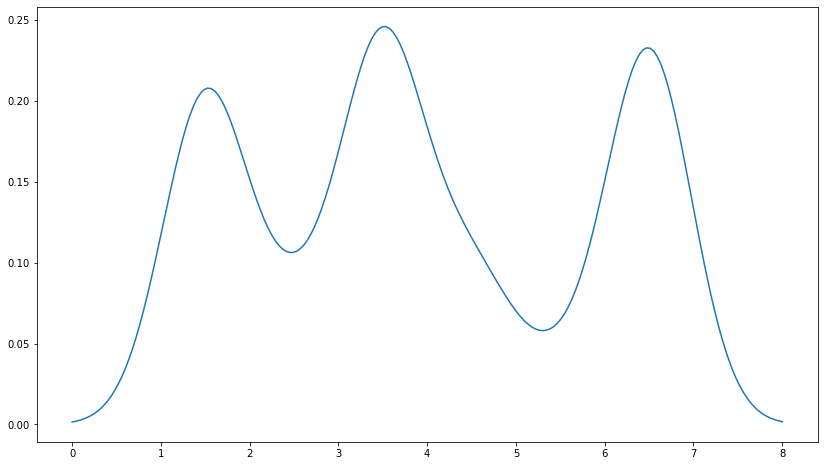

In [40]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Build dummy data
data = [1.5]*7 + [2.5]*2 + [3.5]*8 + [4.5]*3 + [5.5]*1 + [6.5]*8

# Build a "density" function based on the dataset
# When you give a value from the X axis to this function, it returns the according value on the Y axis
density = gaussian_kde(data)
density.covariance_factor = lambda : .25
density._compute_covariance()

# Create a vector of 200 values going from 0 to 8:
xs = np.linspace(0, 8, 200)

# Set the figure size
plt.figure(figsize=(14, 8))

# Make the chart
# We're actually building a line chart where x values are set all along the axis and y value are
# the corresponding values from the density function
plt.plot(xs,density(xs))
plt.show()

## From a `Pandas` dataframe

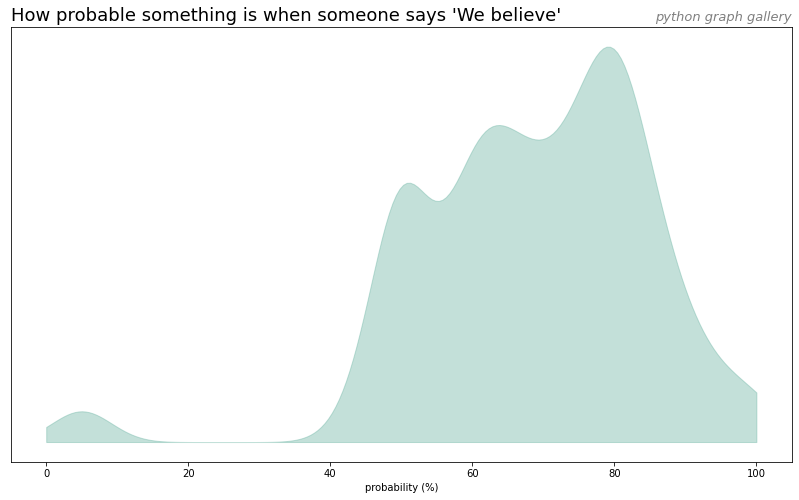

In [41]:
# libraries
import matplotlib.pyplot as plt
import pandas as pd

# load dataset from github and convert it to a long format
data = pd.read_csv("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv")
data = pd.melt(data, var_name='text', value_name='value')

# take only "Almost No Chance", "About Even", "Probable", "Almost Certainly"
data = data.loc[data.text.isin(["We Believe"])]

# Build a "density" function based on the dataset
# When you give a value from the X axis to this function, it returns the according value on the Y axis
density = gaussian_kde(data.value)
density.covariance_factor = lambda : .25
density._compute_covariance()

# Create a vector of 200 values going from 0 to 8:
xs = np.linspace(0, 100, 200)

# Set the figure size
plt.figure(figsize=(14,8))

# plot
plt.fill_between( xs, density(xs), color="#69b3a2", alpha=0.4)

# title
plt.title("How probable something is when someone says 'We believe'", loc='left', fontsize=18)
plt.title("python graph gallery", loc='right', fontsize=13, color='grey', style='italic')

# Axis name
plt.xlabel("probability (%)")

# Remove Y axis
plt.yticks([])

plt.show()
